# To collect source data

In [1]:
#modules and dependencies are imported as needed in this file to emphasize their applicability
import pandas as pd
import glob

In [2]:
#create a dataframe
name_df = pd.DataFrame()

#open, read all text files downloaded from SSN website and name the column labels
for files in glob.glob('../columbia_group_project/SSN_data/*.txt'):
    comb_data = pd.read_csv(files,names=['state', 'gender', 'year', 'name', 'count'])
#concatenate text files in the dataframe
    name_df = pd.concat([name_df,comb_data],axis=0,ignore_index=True)
name_df.head()

,state,gender,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [3]:
import sys

#bring in data for State classification (R/D) by election year - source wikipedia 
#write data into a dataframe 
States_df = pd.DataFrame()
States_df = pd.read_csv('data_files/blueRedStates.csv',encoding='ISO-8859-1')
States_df.head(10)

,state_Name,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,R/D No change 2012 vs. 2016
0,Alabama,AL,R,D,R,R,R,R,R,R,R,R,R,R,True
1,Alaska,AK,R,R,R,R,R,R,R,R,R,R,R,R,True
2,Arizona,AZ,R,R,R,R,R,R,D,R,R,R,R,R,True
3,Arkansas,AR,R,D,R,R,R,D,D,R,R,R,R,R,True
4,California,CA,R,R,R,R,R,D,D,D,D,D,D,D,True
5,Colorado,CO,R,R,R,R,R,D,R,R,R,D,D,D,True
6,Connecticut,CT,R,R,R,R,R,D,D,D,D,D,D,D,True
7,Delaware,DE,R,D,R,R,R,D,D,D,D,D,D,D,True
8,District of Columbia,DC,D,D,D,D,D,D,D,D,D,D,D,D,True
9,Florida,FL,R,D,R,R,R,R,D,R,R,D,D,R,False


# Find top 10 names per gender based on user input year of Presidential Election for Red and Blue States

In [4]:
#convert year in df to be a string
name_df['year']=name_df['year'].astype(str)

# create a list of valid election year choices based ont the States_df column headers
choices=list(States_df.columns[2:14])

while True:
    # ask user to select an election year
    year=str(input("Please choose election year between 1972 and 2016: "))
    print("You entered:", year) #confirms data input
    
    if year in choices:
      #create a selected election year DF by filtering total DF on selected year
        selectedDF=name_df.loc[(name_df['year']==year)].reset_index(drop=True)
        print(selectedDF.head()) #verifies that the input driven df matches expected output
        break
    else:
        print("Not an election year.  Should I google it for you? Try again... ")

Please choose election year between 1972 and 2016: 1974
You entered: 1974
Not an election year.  Should I google it for you? Try again... 
Please choose election year between 1972 and 2016: 1972
You entered: 1972
  state gender  year      name  count
0    AK      F  1972  Jennifer    129
1    AK      F  1972  Michelle     65
2    AK      F  1972      Lisa     48
3    AK      F  1972  Kimberly     45
4    AK      F  1972   Heather     44


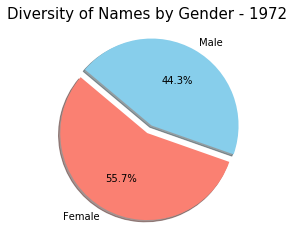

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#Diversity of newborn names by gender
#total row count
total_count=name_df['name'].count()
total_count
#total row count by gender
name_count_df=name_df['gender'].value_counts()
name_count_df

# prepare a pie plot for diversity of names by gender
labels=["Female", "Male"]
sizes=name_count_df
colors=["salmon", "skyblue"]
explode=(0, 0.1)

# Build Pie Chart
plt.title("Diversity of Names by Gender - "+ year, fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

# Show and Save the Figure
plt.savefig("export_files/divercityOfNamesByGender.png")
plt.show()

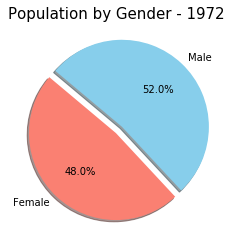

In [6]:
#Newborn population by gender
#total pupulation sum
total_sum=name_df['count'].sum()
total_sum
#total pupulation by gender
name_df_sorted_sum=name_df.groupby('gender')['count'].sum()
name_df_sorted_sum
#total_pupulation
labels=["Female", "Male"]
sizes=name_df_sorted_sum
colors=["salmon", "skyblue"]
explode=(0, 0.1)

# Build Pie Chart
plt.title("Population by Gender - "+ year, fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

# Show and Save the Figure
plt.savefig("export_files/populationByGender.png")
plt.show()

In [7]:
#create a list of states groupedby red(R) for selected presidential eleciton year
# set up lists and append state names based on the R or D vote
red_states=[]
red_states=States_df.loc[States_df[year]=='R','state'].tolist()
red_states #verify output

#create a names df for red states
red_States_names=selectedDF[selectedDF['state'].isin(red_states)]
red_States_names.head() #verify output

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topRedNames=red_States_names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topRedNames_sorted=topRedNames.groupby('gender').head(10)
topRedNames_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,1972,Michael,68707
1,M,1972,Christopher,50268
2,M,1972,James,45622
3,M,1972,David,44676
4,M,1972,Robert,41584
5,M,1972,John,41548
6,M,1972,Jason,36385
7,M,1972,Brian,34995
8,M,1972,William,29522
9,M,1972,Matthew,21962


In [8]:
#create a list of states groupedby blue(D) for selected presidential eleciton year
# set up lists and append state names based on the R or D vote
blue_states=[]
blue_states=States_df.loc[States_df[year]=='D','state'].tolist()
#blue_states #verify output

#create a names df for blue states
blue_States_names=selectedDF[selectedDF['state'].isin(blue_states)]
#blue_States_names #.head() #verify output

#find 10 most pupulart names - for each gender, sorted by the most popular for each gender in decending order
topBlueNames=blue_States_names.groupby(['gender','year','name'])['count'].sum().reset_index().sort_values(by='count',ascending=False).reset_index(drop=True)
topBlueNames_sorted=topBlueNames.groupby('gender').head(10)
topBlueNames_sorted.sort_values(['gender','count'], ascending=False).reset_index(drop=True) 

,gender,year,name,count
0,M,1972,Michael,2698
1,M,1972,Christopher,1921
2,M,1972,David,1690
3,M,1972,John,1633
4,M,1972,James,1461
5,M,1972,Robert,1453
6,M,1972,Brian,1327
7,M,1972,Jason,1061
8,M,1972,William,1007
9,M,1972,Matthew,981


# Create US Map of Red vs. Blue States with to 10 names

In [9]:
import geopandas as gpd

#load GeoDataFrame
usa=gpd.read_file('data_files/states_21basic/states.shp')
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,(POLYGON ((-160.0738033454681 22.0041773479577...
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...
3,Maine,4,23,New England,ME,(POLYGON ((-69.77727626137293 44.0741483685119...
4,North Dakota,5,38,West North Central,ND,POLYGON ((-98.73043728833767 45.93827137024809...


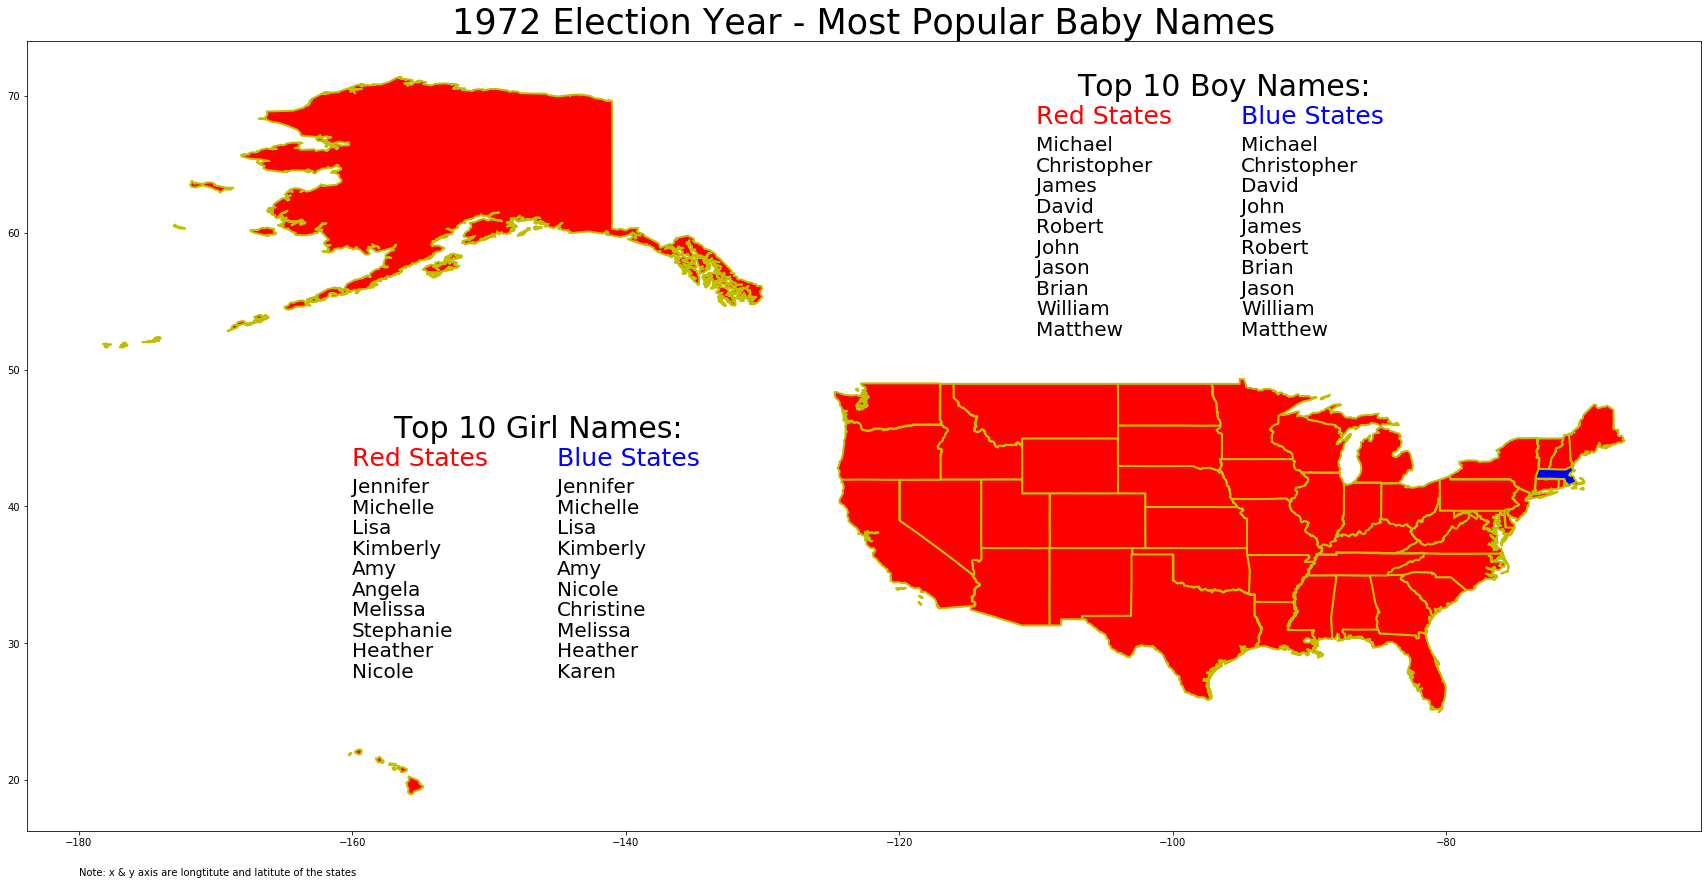

In [10]:
from shapely.geometry import Point, Polygon
import numpy as np

#create a US map by R/D affiliation and show top 10 names
def state_plotter(states, us_map=True):
    fig, ax=plt.subplots(figsize=(30,30))
    if us_map: 
        usa[0:51].plot(ax=ax, alpha=0.3) 
        for n in red_states:
                usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='r', edgecolor='y', linewidth=2)
        for n in blue_states:
                usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='b', edgecolor='y', linewidth=2)
    elif us_map==False:
        for n in states:
            usa[usa.STATE_ABBR==f'{n}'].plot(ax=ax, color='g', edgecolor='y', linewidth=2)
    
state_plotter('red_states','blue_states')

# Give our map a tile and footer
plt.title((year) + " Election Year - Most Popular Baby Names", fontsize=35)
plt.text(-180,13,"Note: x & y axis are longtitute and latitute of the states")

# Incorporate a titles and labels for top names
plt.text(-157,45, "Top 10 Girl Names:", fontsize=30)
plt.text(-160,43, "Red States", fontsize=25,color='red')
plt.text(-145,43, "Blue States", fontsize=25,color='blue')
plt.text(-107,70, "Top 10 Boy Names:", fontsize=30)
plt.text(-110,68, "Red States", fontsize=25,color='red')
plt.text(-95,68, "Blue States", fontsize=25,color='blue')

# to populate girls names
#create lists for names to be loded in the text
yBlueGirls=topBlueNames_sorted.loc[topBlueNames_sorted['gender']=='F','name'].tolist()
yRedGirls=topRedNames_sorted.loc[topRedNames_sorted['gender']=='F','name'].tolist()
#set coordiants for girls lists
yGirls=41
xRedGirls=-160
xBlueGirls=-145
#create a loop to write the names to the text on the map
for name in yRedGirls:
    plt.text(xRedGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
yGirls=41   #reset yGirls for blue loop 
for name in yBlueGirls:
    plt.text(xBlueGirls, yGirls,name,fontsize=20)
    yGirls=yGirls-1.5
    
# to populate boys names
#create lists for names bo be loaded in the text
yBlueBoys=topBlueNames_sorted.loc[topBlueNames_sorted['gender']=='M','name'].tolist()
yRedBoys=topRedNames_sorted.loc[topRedNames_sorted['gender']=='M','name'].tolist()
#set coordiants for boys lists
yBoys=66
xRedBoys=-110
xBlueBoys=-95
#create a loop to write the names to the text on the map
for name in yRedBoys:
    plt.text(xRedBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5
yBoys=66   #reset yBoys for blue loop 
for name in yBlueBoys:
    plt.text(xBlueBoys, yBoys,name,fontsize=20)
    yBoys=yBoys-1.5
    
# Save and show the Figure
plt.savefig("export_files/US_Map_Top10Names.png", bbox_inches="tight")
plt.show()

In [11]:
#write output to csv
topRedNames_sorted.to_csv('export_files/10popular4electionYr.csv',header=True) 

# Combined Election Year Results

In [12]:
#combine Red & Blue State results into one DF to idenity matches and variances in top 10 names
name_summary_df=pd.merge(topRedNames_sorted,topBlueNames_sorted,how='outer', 
                         on=['name','gender'], suffixes=('Red','Blue'))
name_summary_df.replace(np.nan, 0, inplace=True)
name_summary_df['Red']=np.where(name_summary_df['countRed']>0,'R','') #to add a column ideintifying name in the red state
name_summary_df['Blue']=np.where(name_summary_df['countBlue']>0,'B','') #to add a column identifying name in the blue state
name_summary_df['Red_Blue']= name_summary_df.Red + name_summary_df.Blue #to combine red and blue state columns   
name_summary_df.Red_Blue.replace(['RB','R','B'],['R & B', 'R', 'B'],inplace=True) #replace values in Red_Blue column

#to highlight zero's in count columns
def highlight_zero(s):
    is_zero=s==s.min()
    return['background-color:yellow' if v else '' for v in is_zero]

#finalize presentation of the df
name_summary_df.drop(['yearRed','yearBlue','Red','Blue'],axis=1).sort_values('gender').reset_index(drop=True).style.apply(highlight_zero, subset=['countRed','countBlue']).format({'countRed': '{:,.0f}','countBlue': '{:,.0f}'})

,gender,name,countRed,countBlue,Red_Blue
0,F,Michelle,"28,224","1,060",R & B
1,F,Nicole,"15,024",728,R & B
2,F,Heather,"15,706",615,R & B
3,F,Stephanie,"16,458",0,R
4,F,Melissa,"21,835",668,R & B
5,F,Angela,"23,229",0,R
6,F,Amy,"25,101",772,R & B
7,F,Kimberly,"25,402",888,R & B
8,F,Lisa,"26,489","1,060",R & B
9,F,Christine,0,684,B


In [13]:
#import name origin df
#match to the names
#create a origin wheel